In [33]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, ComplementNB, BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [34]:
# Combine all PDBs into a single dataframe
dfs = []
for filename in os.listdir('data/features_ring'):
    dfs.append(pd.read_csv('data/features_ring/' + filename, sep='\t'))
df = pd.concat(dfs)

# Create a new class 'Missing' for unclassified contacts
df['Interaction'].fillna('Missing', inplace=True)
df

,pdb_id,s_ch,s_resi,s_ins,s_resn,s_ss8,s_rsa,s_phi,s_psi,s_a1,...,t_phi,t_psi,t_a1,t_a2,t_a3,t_a4,t_a5,t_3di_state,t_3di_letter,Interaction
0,4hfq,B,38,,S,H,0.615,-1.108,-0.815,-0.228,...,-1.112,-0.770,-0.228,1.399,-4.760,0.670,-2.647,17.0,R,Missing
1,4hfq,A,112,,K,H,0.200,-1.063,-0.821,1.831,...,-1.127,-0.654,1.357,-1.453,1.477,0.113,-0.837,17.0,R,IONIC
2,4hfq,A,112,,K,H,0.200,-1.063,-0.821,1.831,...,-1.127,-0.654,1.357,-1.453,1.477,0.113,-0.837,17.0,R,HBOND
3,4hfq,A,182,,I,-,0.000,-2.834,2.480,-1.239,...,-1.124,-0.763,0.931,-0.179,-3.005,-0.503,-1.853,14.0,O,Missing
4,4hfq,B,114,,I,H,0.000,-1.031,-0.826,-1.239,...,-1.716,-0.367,-0.032,0.326,2.213,0.908,1.313,4.0,E,HBOND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,8tsy,A,40,,P,S,0.463,-1.121,2.669,0.189,...,-2.637,2.686,-0.032,0.326,2.213,0.908,1.313,5.0,F,Missing
678,8tsy,A,5,,I,E,0.000,-2.101,2.281,-1.239,...,-2.265,2.245,0.931,-0.179,-3.005,-0.503,-1.853,2.0,C,HBOND
679,8tsy,A,10,,F,-,0.005,-2.343,2.753,-1.006,...,-1.317,2.946,0.189,2.081,-1.628,0.421,-1.392,5.0,F,VDW
680,8tsy,A,91,,A,H,0.113,-1.136,-0.447,-0.591,...,-1.203,2.553,-0.591,-1.302,-0.733,1.570,-0.146,6.0,G,Missing


In [35]:
# Remove all rows with NaN in at least one column
df.dropna(inplace=True)

# Define ground truth values
y = df['Interaction'].astype('category')

In [36]:
# Define training features
columns = ['s_ss8', 's_rsa', 's_phi', 's_psi', 's_a1', 's_a2', 's_a3', 's_a4', 's_a5', 's_3di_state', 's_3di_letter',
               't_ss8', 't_rsa', 't_phi', 't_psi', 't_a1','t_a2', 't_a3', 't_a4', 't_a5', 't_3di_state', 't_3di_letter']

X = df[columns]

# Calculate percentiles and transform into categories
X = X.rank(pct=True).round(1).astype('category') 
X

,s_ss8,s_rsa,s_phi,s_psi,s_a1,s_a2,s_a3,s_a4,s_a5,s_3di_state,...,t_rsa,t_phi,t_psi,t_a1,t_a2,t_a3,t_a4,t_a5,t_3di_state,t_3di_letter
0,0.6,1.0,0.7,0.1,0.5,0.9,0.0,0.6,0.1,0.9,...,0.8,0.7,0.2,0.5,0.9,0.0,0.6,0.1,0.9,0.9
1,0.6,0.7,0.8,0.1,1.0,0.3,0.5,0.3,0.9,0.9,...,0.9,0.7,0.3,0.8,0.1,0.7,0.4,0.4,0.9,0.9
2,0.6,0.7,0.8,0.1,1.0,0.3,0.5,0.3,0.9,0.9,...,0.9,0.7,0.3,0.8,0.1,0.7,0.4,0.4,0.9,0.9
3,0.1,0.1,0.0,0.8,0.1,0.4,0.8,0.5,0.6,0.6,...,0.1,0.7,0.2,0.7,0.5,0.1,0.2,0.1,0.6,0.6
4,0.6,0.1,0.8,0.1,0.1,0.4,0.8,0.5,0.6,0.1,...,0.1,0.3,0.5,0.5,0.7,0.9,0.7,0.7,0.2,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,0.9,0.9,0.7,0.9,0.6,1.0,0.2,0.5,0.2,1.0,...,0.5,0.0,0.9,0.5,0.7,0.9,0.7,0.7,0.2,0.2
678,0.3,0.1,0.2,0.7,0.1,0.4,0.8,0.5,0.6,0.2,...,0.9,0.1,0.7,0.7,0.5,0.1,0.2,0.1,0.1,0.1
679,0.1,0.2,0.1,0.9,0.3,0.3,0.8,0.2,0.6,0.0,...,0.1,0.5,1.0,0.6,1.0,0.2,0.5,0.2,0.2,0.2
680,0.6,0.5,0.6,0.5,0.4,0.1,0.4,1.0,0.5,0.9,...,0.4,0.5,0.9,0.4,0.1,0.3,1.0,0.5,0.3,0.3


In [37]:
# Split the dataset to define training and testing examples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
y_test.value_counts()

Interaction
Missing      106067
HBOND        102591
VDW           71945
PIPISTACK      3765
IONIC          3381
PICATION        888
SSBOND          212
PIHBOND         194
Name: count, dtype: int64

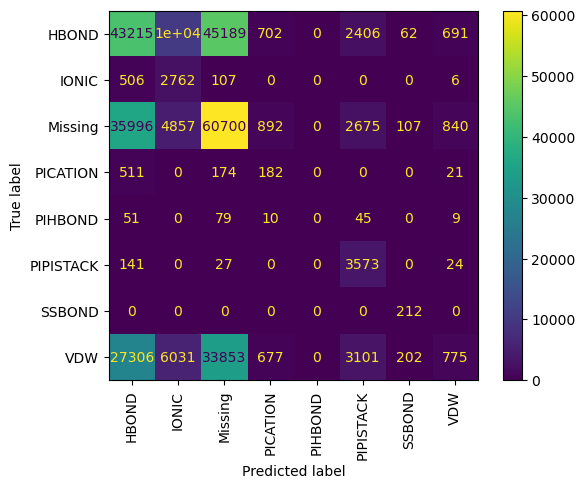

In [38]:
nb = GaussianNB()
y_pred = nb.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test,y_pred) #, normalize='true')
plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
plot.plot(xticks_rotation='vertical')

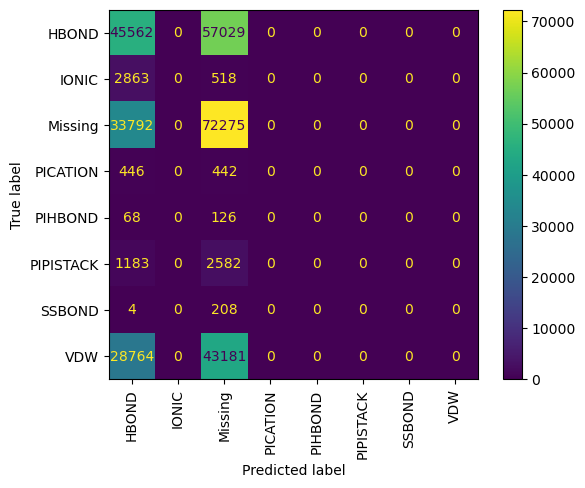

In [39]:
nb = MultinomialNB()
y_pred = nb.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test,y_pred) #, normalize='true')
plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
plot.plot(xticks_rotation='vertical')

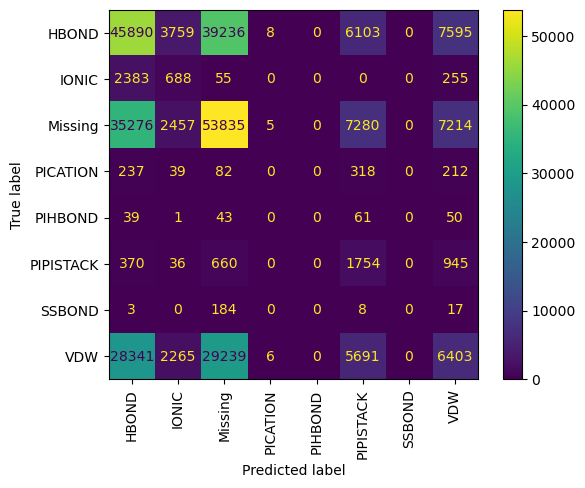

In [40]:
nb = ComplementNB()
y_pred = nb.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test,y_pred) #, normalize='true')
plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
plot.plot(xticks_rotation='vertical')

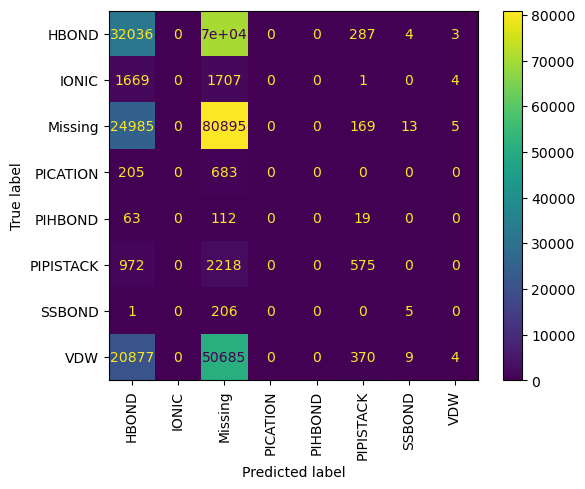

In [41]:
nb = BernoulliNB()
y_pred = nb.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test,y_pred) #, normalize='true')
plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
plot.plot(xticks_rotation='vertical')

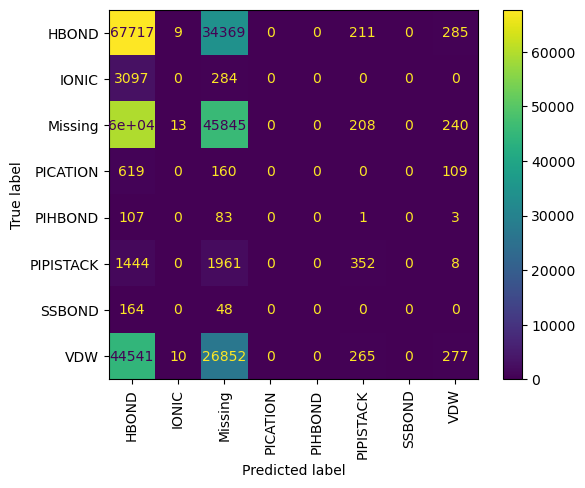

In [42]:
nb = CategoricalNB()
y_pred = nb.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test,y_pred) #, normalize='true')
plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
plot.plot(xticks_rotation='vertical')